DATA UNDERSTANDING
-Importing Libraries
- Loading Datasets
- Data Description
-Intergrate Data

In [4]:
#IMPORTING lIBRARIES
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/content/CDR_description.xlsx')
df.head()

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String


In [6]:
#Finding and removing missing data
df.isnull

<bound method DataFrame.isnull of        Column name                                        Description   Format
0          PRODUCT                                       Voice or SMS   String
1            VALUE                                      Billing price  Integer
2        DATE_TIME               Time in format yyyy-MM-dd hh:mm:ss.0   String
3     CELL_ON_SITE  Which cell in the site was used (not needed here)  Integer
4  DW_A_NUMBER_INT  Anonymized phone number of the person for whic...   String
5  DW_B_NUMBER_INT        Anonymized phone number of the counterparty   String
6        COUNTRY_A                  Country of party A (useless here)   String
7        COUNTRY_B                  Country of party B (useless here)   String
8          CELL_ID                                     ID of the cell   String
9          SITE_ID                                     ID of the SITE   String>

In [7]:
df_desc = pd.read_excel('/content/cells_geo_description.xlsx')
df_desc.head()

,Column name,Description,Format
0,VILLES,City,String
1,STATUS,In Service or not,String
2,LOCALISATION,in ABIDJAN or not,String
3,DECOUPZONE,Geographical Zone,String
4,ZONENAME,Name of Zone,String


DATA INTERGRATION

In [8]:
#merging tables
merge_tables = [df,df_desc]
result = pd.concat(merge_tables)
result

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


In [34]:
#Identify and remove duplicates from the merged tables
result.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
dtype: bool

In [35]:
#Removing duplicares
result.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


In [44]:
#Telecom_dataset(1)
Telcom_dataset1 = pd.read_csv('/content/Telcom_dataset.csv')
Telcom_dataset1.columns = ['method', 'value', 'date','D','E','F','G', 'H', 'I','J']

Telcom_dataset1.head()

,method,value,date,D,E,F,G,H,I,J
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [22]:
#Get the description of the data
Telcom_dataset1.info

<bound method DataFrame.info of      PRODUTC  VALUE               DATETIME  ... COUNTRY_B     CELL_ID     SITE_ID
0      Voice      0  2012-05-06 23:04:37.0  ...     19e2e  /TJNe+Mmtu  /TJNe+Mmtu
1        sms      0  2012-05-06 23:05:25.0  ...     19e2e  /+cKZKIp41  /+cKZKIp41
2        sms     25  2012-05-06 23:05:41.0  ...     19e2e  /u0FSD+ahi  /u0FSD+ahi
3      Voice     56  2012-05-06 23:05:42.0  ...     19e2e  +cNeJzsTp3  +cNeJzsTp3
4      Voice     14  2012-05-06 23:06:29.0  ...     19e2e  051KhYDCpv  051KhYDCpv
...      ...    ...                    ...  ...       ...         ...         ...
4996     sms    100  2012-05-07 00:01:54.0  ...     OTHER  0c2371d9bc  1e751d08a4
4997   Voice      1  2012-05-07 00:01:54.0  ...     19e2e  5fb791cf56  65efe2bc62
4998   Voice      0  2012-05-07 00:01:54.0  ...     19e2e  7773627c12  9ef9616350
4999   Voice      0  2012-05-07 00:01:54.0  ...     19e2e  3f4af49d6c  969b8d0e39
5000   Voice      7  2012-05-07 00:01:54.0  ...     19e2e  6f4d9b7

In [50]:
#slicing the data by selecting only few columns
Telcom_dataset11 = Telcom_dataset1[["method","value","date"]]
Telcom_dataset11

,method,value,date
0,Voice,0,2012-05-06 23:04:37.0
1,sms,0,2012-05-06 23:05:25.0
2,sms,25,2012-05-06 23:05:41.0
3,Voice,56,2012-05-06 23:05:42.0
4,Voice,14,2012-05-06 23:06:29.0
...,...,...,...
4996,sms,100,2012-05-07 00:01:54.0
4997,Voice,1,2012-05-07 00:01:54.0
4998,Voice,0,2012-05-07 00:01:54.0
4999,Voice,0,2012-05-07 00:01:54.0


DATA VISUALIZATION

Text(0.5, 1.0, 'scatter graph')

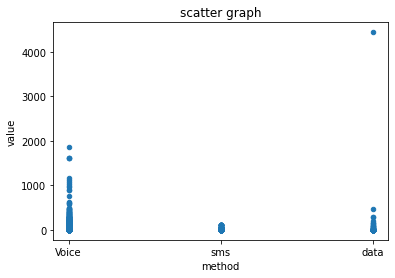

In [52]:
#Data Visualization by using Scatter Plots
Telcom_dataset11.plot(x ='method', y='value', kind = 'scatter')
plt.title("scatter graph")

Text(0.5, 1.0, '')

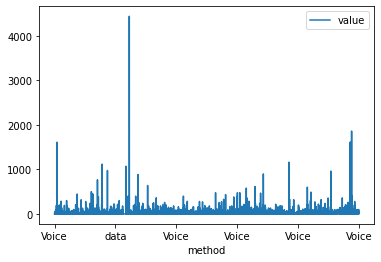

In [56]:
#Data Visualization
Telcom_dataset11.plot(x ='method', y='value')
plt.title("")

In [ ]:
#Telecom_dataset(2)
Telcom_dataset2 = pd.read_csv('/content/Telcom_dataset2.csv')
Telcom_dataset2.head()

In [ ]:
#Telecom_dataset3
Telcom_dataset3 = pd.read_csv('/content/Telcom_dataset3.csv')
Telcom_dataset3.head()

In [ ]:
#remove Duplicate entries from combined table Telcom
Telcom_drop = Telcom_dataset3.dropna(how='all')
Telcom_drop
Telcom_dataset3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)